In [1]:
import tensorflow as tf

In [7]:
from alpha import random_mini_batch, load_data, plot_images, plot_confusion_matrix, misclassified_images, plot_images_misclassified, iterate_minibatches
from cnn_utils import create_placeholders, conv_layer, compute_cost

In [12]:
import pandas as pd
import numpy as np
import os
import datetime, time
from datetime import datetime
from tqdm import tqdm as tqdm #For professional progress-bar
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

%matplotlib inline

In [91]:
image_size = 99
N_CHANNELS = 3
input_dims = (None, image_size, image_size, N_CHANNELS)

In [92]:
TRAIN_DIR = "./test"
IMG_SIZE = image_size #If changing, change in alpha.py as well
img_shape = (IMG_SIZE,IMG_SIZE,3)
num = 100
train, label= load_data(num, IMG_SIZE, DIR =TRAIN_DIR)
label_df = pd.DataFrame(label, columns = ['classes'])
label_unique = label_df.classes.unique()
en = LabelEncoder()
en.fit(label_df.classes)
encoded_label = en.transform(label_df.classes)
label_df["encoded_label"] = encoded_label

10it [00:00, 123.83it/s]
10it [00:00, 255.49it/s]
10it [00:00, 134.78it/s]


In [100]:
def load_graph(frozen_graph_filename):
    with tf.gfile.GFile(frozen_graph_filename, "rb") as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        
    with tf.Graph().as_default() as graph:
        tf.import_graph_def(graph_def, name="ltdcnn")
    return graph

In [109]:
frozen_graph="./ltdcnn.pb"
graph = load_graph(frozen_graph)
#for op in graph.get_operations():
#    print(op.name)

In [102]:
#Get nodes
x = graph.get_tensor_by_name('ltdcnn/Placeholder:0')
y = graph.get_tensor_by_name('ltdcnn/prediction:0')

In [106]:
x_train = train#[2:3]
label_val = np.array(label_df["classes"].iloc[2:3]) 

In [107]:
x_train.shape

(30, 99, 99, 3)

In [108]:
with tf.Session(graph=graph) as sess:
    y_out = sess.run(y, feed_dict={x:x_train})
    print(y_out)

[2 1 1 1 2 0 0 2 0 2 0 2 1 1 2 1 2 0 1 0 1 1 0 1 0 2 2 2 1 1]


In [81]:
decoded_label_val = en.inverse_transform(y_out)
decoded_label_val

array(['Fuel Filter'], dtype=object)

<function matplotlib.pyplot.show>

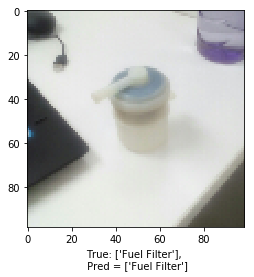

In [82]:
plt.imshow(np.squeeze(x_train))
plt.xlabel("True: {0}, \n Pred = {1}".format(label_val, decoded_label_val))
plt.show